# Collision Prediction

![banner](banner.jpeg)

<div style="background-color:#C5EBAA; padding:10px; border-radius:5px; border: 2px solid #cccccc; text-align:center;">
    <h2>OVERVIEW</h2>
</div>

## Purpose

The goal of this project is to develop a predictive software tool that can assess the likelihood of fatal collisions, benefiting both the police department and the general public. For law enforcement, the tool will aid in enhancing security measures and planning road conditions in specific neighborhoods. Meanwhile, individuals will be able to utilize the tool to evaluate the necessity for additional precautions based on factors such as weather conditions and time. Leveraging a dataset collected by the Toronto police department over five years, the project aims to create a predictive service that can classify incidents as either resulting in fatality or not, using relevant features.

## Dataset

The dataset used in this project is sourced from the Toronto Police Service's official data repository. For more information, visit [here](https://data.torontopolice.on.ca/datasets/TorontoPS::ksi/about).

This dataset encompasses traffic collision events resulting in either fatalities or serious injuries (KSI) from 2006 to 2022 within Toronto. To comply with privacy regulations, the Toronto Police Service has safeguarded the personal information of individuals involved in these incidents. Location data has been intentionally obscured to the nearest road intersection node to ensure privacy. Users should regard all location information as approximations, not tied to specific addresses or individuals. While intended to inform communities about public safety, the data is preliminary and may not be fully verified.

<div style="background-color:#C5EBAA; padding:10px; border-radius:5px; border: 2px solid #cccccc; text-align:center;">
    <h2>DATA EXPLORATION</h2>
</div>

## Info of Data

In [2]:
# Load Data
import pandas as pd
data = pd.read_csv('KSI.csv')

In [3]:
# column names, data types, none null values count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

In [4]:
# Statistical assessments, 
# Including count, mean, standard deviation, min, max, percentiles
data.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.819400e+04,1.819400e+04,1.819400e+04,1.326400e+04,18194.000000,18194.000000,1.733200e+04,18194.000000,18194.000000,827.000000,18194.000000
mean,-8.838345e+06,5.420748e+06,3.818870e+07,4.248444e+08,2012.934869,1362.615917,2.521028e+03,43.710459,-79.396201,29.073761,9097.500000
std,1.162533e+04,8.682160e+03,3.726463e+07,1.065503e+09,4.754258,630.816048,1.844803e+05,0.056369,0.104432,17.803627,5252.299734
min,-8.865305e+06,5.402162e+06,3.363207e+06,2.530100e+04,2006.000000,0.000000,1.000000e+00,43.589678,-79.638390,1.000000,1.000000
25%,-8.846591e+06,5.413242e+06,5.391370e+06,1.021229e+06,2009.000000,920.000000,7.000000e+00,43.661727,-79.470280,14.000000,4549.250000
50%,-8.838448e+06,5.419556e+06,7.644612e+06,1.197308e+06,2012.000000,1450.000000,1.300000e+01,43.702745,-79.397132,28.000000,9097.500000
75%,-8.829671e+06,5.427813e+06,8.078261e+07,1.365020e+06,2017.000000,1850.000000,2.200000e+01,43.756345,-79.318286,42.000000,13645.750000
max,-8.807929e+06,5.443099e+06,8.170606e+07,4.008024e+09,2022.000000,2359.000000,1.716222e+07,43.855445,-79.122974,78.000000,18194.000000


In [5]:
# Evaluate and summarize null values
null_cols = data.columns[data.isnull().any()]
null_counts = data[null_cols].isnull().sum()

# Sort by the number of null values
null_counts_sorted = null_counts.sort_values(ascending=False)
print(null_counts_sorted)

EMERG_VEH        18151
DISABILITY       17708
CYCCOND          17429
CYCACT           17428
CYCLISTYPE       17420
ALCOHOL          17406
FATAL_NO         17367
TRSN_CITY_VEH    17084
TRUCK            17072
REDLIGHT         16674
MOTORCYCLE       16607
CYCLIST          16288
SPEEDING         15619
PEDTYPE          15134
PEDACT           15112
PEDCOND          15110
OFFSET           14792
PASSENGER        11288
PEDESTRIAN       10840
DRIVCOND          8954
DRIVACT           8951
AG_DRIV           8734
INJURY            8567
MANOEUVER         7660
ACCLOC            5450
INITDIR           5052
ACCNUM            4930
VEHTYPE           3228
STREET2           1684
AUTOMOBILE        1644
WARDNUM            862
ROAD_CLASS         376
DISTRICT           105
LOCCOORD            95
TRAFFCTL            34
RDSFCOND            25
VISIBILITY          20
INVTYPE             16
ACCLASS              5
IMPACTYPE            4
dtype: int64


## Visualizing Data

### Graphical Data

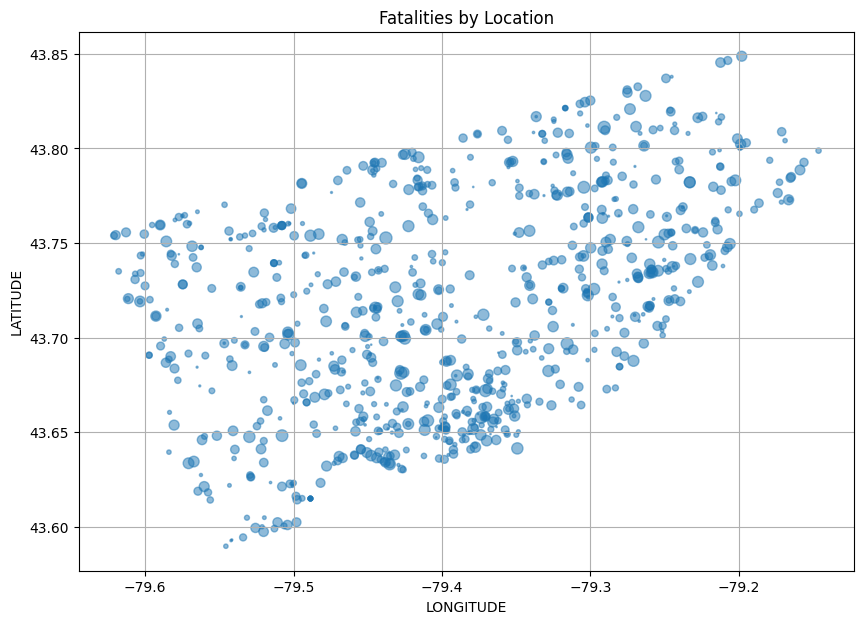

In [6]:
import matplotlib.pyplot as plt

data.plot(kind="scatter", x='LONGITUDE', y='LATITUDE', grid=True, alpha=0.5,
         s="FATAL_NO",  figsize=(10,7))
plt.title("Fatalities by Location")
plt.show()

### Correlationships of Numerical Data

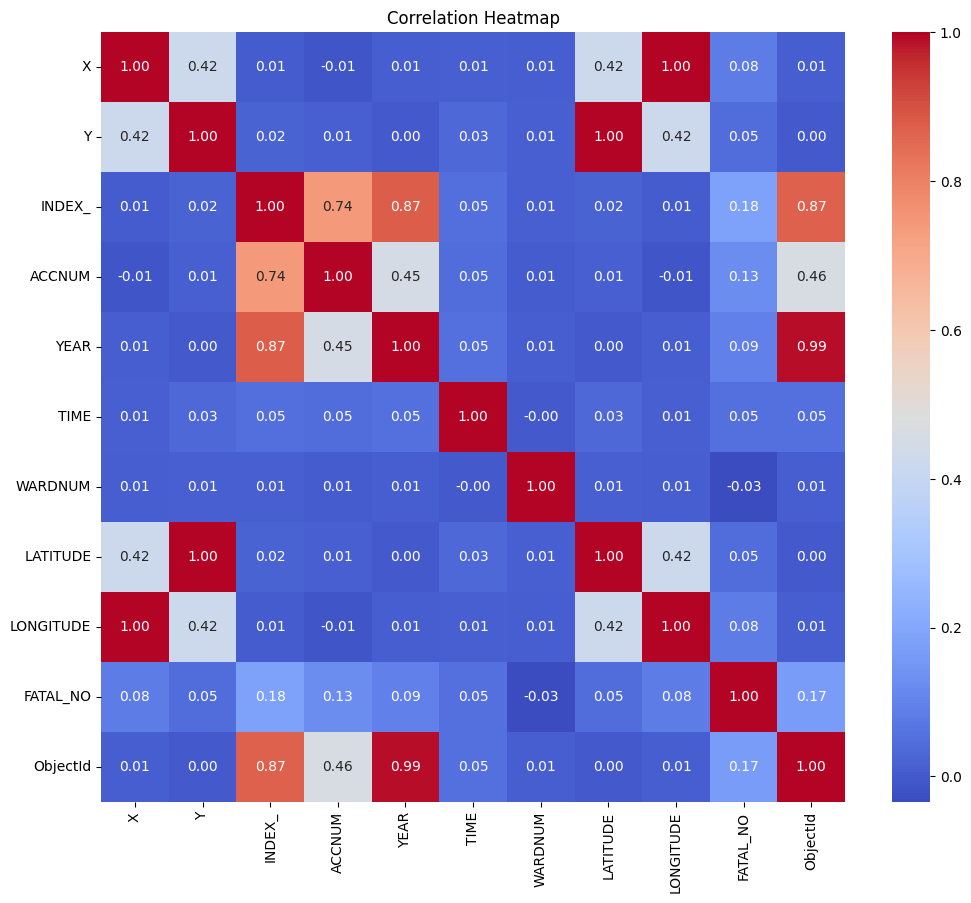

In [7]:
import seaborn as sns
import numpy as np 

# Before categorical data management, we can visualize the numeric data to get quick partial insights
num_data = data.select_dtypes(np.number)

# Calculate the correlation matrix
corr_matrix = num_data.corr()

# Create a heatmap. heatmap is more clear for multiple features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# The heatmap is less meaningful before we thoroughly preprocess the data.
# We can have a piece of data to help us understand info from the heatmap.
# .head() only provides the ordered earlest data. Compare with randomized .sample() we can better understand the columns.

print(num_data.sample(5))
print(num_data.head(5))

                  X             Y    INDEX_     ACCNUM  YEAR  TIME  WARDNUM  \
2756  -8.828035e+06  5.429755e+06   4405971   988601.0  2007   217     21.0   
5497  -8.832020e+06  5.416954e+06   5796898  1144508.0  2009  1700     14.0   
7016  -8.857168e+06  5.424870e+06   6630749  1234913.0  2011  1350      1.0   
1786  -8.835939e+06  5.412522e+06   4157889   963934.0  2007  1400     13.0   
11491 -8.831225e+06  5.425332e+06  80229622        NaN  2015  1920     16.0   

        LATITUDE  LONGITUDE  FATAL_NO  ObjectId  
2756   43.768945 -79.303590       NaN      2757  
5497   43.685845 -79.339390       NaN      5498  
7016   43.737245 -79.565290       NaN      7017  
1786   43.657045 -79.374590       NaN      1787  
11491  43.740245 -79.332248       NaN     11492  
              X             Y   INDEX_    ACCNUM  YEAR  TIME  WARDNUM  \
0 -8.844611e+06  5.412414e+06  3387730  892658.0  2006   852      4.0   
1 -8.844611e+06  5.412414e+06  3387731  892658.0  2006   852      4.0   
2 -8.8

**Insights from the heatmap:**

1. "longitude" and "x", "latitude" and "y" are representing the same things, we just need to choose one pair of them.
2. From the comparison of head() and sample(), we can see "ObjectId", "indexing" are identifiers. No matter how they correlate to other features, we need to drop them. 
3. Anyway, we have a lot to do before letting the data tell the story.

<div style="background-color:#C5EBAA; padding:10px; border-radius:5px; border: 2px solid #cccccc; text-align:center;">
    <h2>DATA MODELLING</h2>
</div>

## 1. Feature Selection

According to purpose, **measures of security, road condition, location, time** can be features, and the accident class can be target.

Discarded features:
- ids: 'INDEX_', 'ObjectId'
- irrevalent: 'ACCNUM',  'WARDNUM', 'VEHTYPE', 'PEDCOND', 'PEDCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
- duplicated features:
  - geographic data are overlapping, discard all except 'LATITUDE' and 'LONGITUDE'. As continuous numbers, they are capable to represent any exact location, and easy to process.
    - descarded: 'STREET1','STREET2', 'OFFSET', 'DISTRICT', 'INITDIR',  'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION'
  - 'DRIVCOND' can be replaced with 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY' the latter are binary and easy to process
- Alternative target columns:
    - These columns are not features. They can be useful for another topic.
    - 'IMPACTYPE', 'INVTYPE','INVAGE', 'INJURY', 'FATAL_NO', 'MANOEUVER', 'DRIVACT',

### Select and Drop Features

In [9]:
relavent_cols = ['YEAR', 'DATE', 'TIME',  # Time
                 'LATITUDE', 'LONGITUDE',  # Geographic data
                 'ROAD_CLASS', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT','RDSFCOND', # Road Condition
                 'DRIVCOND','SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', # Measures of security
                 'ACCLASS'] # Target class
df_selected = data[relavent_cols]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        18194 non-null  int64  
 1   DATE        18194 non-null  object 
 2   TIME        18194 non-null  int64  
 3   LATITUDE    18194 non-null  float64
 4   LONGITUDE   18194 non-null  float64
 5   ROAD_CLASS  17818 non-null  object 
 6   LOCCOORD    18099 non-null  object 
 7   TRAFFCTL    18160 non-null  object 
 8   VISIBILITY  18174 non-null  object 
 9   LIGHT       18194 non-null  object 
 10  RDSFCOND    18169 non-null  object 
 11  DRIVCOND    9240 non-null   object 
 12  SPEEDING    2575 non-null   object 
 13  AG_DRIV     9460 non-null   object 
 14  REDLIGHT    1520 non-null   object 
 15  ALCOHOL     788 non-null    object 
 16  DISABILITY  486 non-null    object 
 17  ACCLASS     18189 non-null  object 
dtypes: float64(2), int64(2), object(14)
memory usage: 2.5+ MB


### Get More Features from Date and Time

In [10]:
# The date and time are too trivial, we can translate them into month, weekdays, hours, to get more meaningful insights
# convert 'DATE' and 'TIME'
df_copy = df_selected.copy()
df_copy['DATE'] = pd.to_datetime(df_copy['DATE'])
df_copy['MONTH'] = df_copy['DATE'].dt.month
df_copy['WEEKDAY'] = df_copy['DATE'].dt.weekday
df_copy['HOUR'] = df_copy['TIME'] // 100 # max of TIME is 2359, so we assume it representing 23:59
df_copy.drop(['DATE', 'TIME'], axis=1, inplace=True)

print('Unique months: ', df_copy['MONTH'].unique())
print('Unique weekdays: ', df_copy['WEEKDAY'].unique())
print('Unique hours: ', df_copy['HOUR'].unique())
print(f'Current columns: ', df_copy.columns.values)

Unique months:  [ 3  1  6  7  8  5  2  4  9 10 11 12]
Unique weekdays:  [5 6 2 3 4 1 0]
Unique hours:  [ 8  9  2 19 20 10 15 13 17  0 12 16 18 21  1 14 11 23  3  7 22  6  5  4]
Current columns:  ['YEAR' 'LATITUDE' 'LONGITUDE' 'ROAD_CLASS' 'LOCCOORD' 'TRAFFCTL'
 'VISIBILITY' 'LIGHT' 'RDSFCOND' 'DRIVCOND' 'SPEEDING' 'AG_DRIV'
 'REDLIGHT' 'ALCOHOL' 'DISABILITY' 'ACCLASS' 'MONTH' 'WEEKDAY' 'HOUR']


## 2. Handle Null Values

### Null Value Distribution

In [11]:
# For missing values, we should use different stategy according to the features' natures
df_copy.isnull().sum()

YEAR              0
LATITUDE          0
LONGITUDE         0
ROAD_CLASS      376
LOCCOORD         95
TRAFFCTL         34
VISIBILITY       20
LIGHT             0
RDSFCOND         25
DRIVCOND       8954
SPEEDING      15619
AG_DRIV        8734
REDLIGHT      16674
ALCOHOL       17406
DISABILITY    17708
ACCLASS           5
MONTH             0
WEEKDAY           0
HOUR              0
dtype: int64

### Drop Suspicious Rows

In [12]:
# Since we have big size of data, we can drop the missing values in some columns missing few values.
# This is also helpful to get rid of poor records
few_miss_cols = df_copy.columns[(df_copy.isnull().sum() < 500) & (df_copy.isnull().sum() > 0)]
df_drop_records = df_copy.dropna(subset=few_miss_cols)
df_drop_records.isnull().sum()

YEAR              0
LATITUDE          0
LONGITUDE         0
ROAD_CLASS        0
LOCCOORD          0
TRAFFCTL          0
VISIBILITY        0
LIGHT             0
RDSFCOND          0
DRIVCOND       8675
SPEEDING      15244
AG_DRIV        8468
REDLIGHT      16165
ALCOHOL       16950
DISABILITY    17209
ACCLASS           0
MONTH             0
WEEKDAY           0
HOUR              0
dtype: int64

### Investigate and Impute Missing Values

In [13]:
# investigate the values in the rest columns that contains missing values
many_miss_cols = df_drop_records.columns[df_drop_records.isnull().sum() > 500]
for col in many_miss_cols:
    unique_values = df_drop_records[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'DRIVCOND': ['Unknown' nan 'Ability Impaired, Alcohol' 'Normal'
 'Ability Impaired, Alcohol Over .08' 'Inattentive' 'Had Been Drinking'
 'Medical or Physical Disability' 'Fatigue' 'Other'
 'Ability Impaired, Drugs']
Unique values in column 'SPEEDING': [nan 'Yes']
Unique values in column 'AG_DRIV': ['Yes' nan]
Unique values in column 'REDLIGHT': [nan 'Yes']
Unique values in column 'ALCOHOL': [nan 'Yes']
Unique values in column 'DISABILITY': [nan 'Yes']


In [14]:
# clearly, we should fill 'Unknown' to 'DRIVCOND', and 'No' for the rest
# In this case, advanced imputing techniques such as decision tree may not be realistic
df_nonull = df_drop_records.copy()
df_nonull.fillna({'DRIVCOND': 'Unknown'}, inplace=True)
df_nonull.fillna('No', inplace=True) # fill 'No' to all the rest
df_nonull.isnull().sum()

YEAR          0
LATITUDE      0
LONGITUDE     0
ROAD_CLASS    0
LOCCOORD      0
TRAFFCTL      0
VISIBILITY    0
LIGHT         0
RDSFCOND      0
DRIVCOND      0
SPEEDING      0
AG_DRIV       0
REDLIGHT      0
ALCOHOL       0
DISABILITY    0
ACCLASS       0
MONTH         0
WEEKDAY       0
HOUR          0
dtype: int64

## 3. Imbalance Classes

In [15]:
# check balance of target
df_nonull.ACCLASS.value_counts()

ACCLASS
Non-Fatal Injury        15208
Fatal                    2461
Property Damage Only       16
Name: count, dtype: int64

The classes are imbalanced. We can resample it for better applicability.
For the same reason, we can transfer the target class to numeric.

In [16]:
pd.set_option('future.no_silent_downcasting', True) # surpress future warning

# use map function to replace values in target column
# due to the low quantity and insignificant of "Property Damage Only", treat it the same as 'Non-Fatal Injury'
target_mapping = {'Fatal': 1, 'Property Damage Only': 0, 'Non-Fatal Injury': 0}
df_nonull['ACCLASS'] = df_nonull['ACCLASS'].replace(target_mapping)

In [17]:
# resample the imbalanced classes
from sklearn.utils import resample

# Separate majority and minority classes
df_nonfatal = df_nonull[df_nonull.ACCLASS==0]
df_fatal  = df_nonull[df_nonull.ACCLASS==1]

# Upsample fatal class
df_fatal_upsampled = resample(df_fatal, replace=True, n_samples=15224, random_state=38)
df_balanced = pd.concat([df_nonfatal, df_fatal_upsampled])

df_balanced.ACCLASS.value_counts()

ACCLASS
0    15224
1    15224
Name: count, dtype: int64

In [18]:
# Investigate the data again 
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30448 entries, 3 to 2837
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        30448 non-null  int64  
 1   LATITUDE    30448 non-null  float64
 2   LONGITUDE   30448 non-null  float64
 3   ROAD_CLASS  30448 non-null  object 
 4   LOCCOORD    30448 non-null  object 
 5   TRAFFCTL    30448 non-null  object 
 6   VISIBILITY  30448 non-null  object 
 7   LIGHT       30448 non-null  object 
 8   RDSFCOND    30448 non-null  object 
 9   DRIVCOND    30448 non-null  object 
 10  SPEEDING    30448 non-null  object 
 11  AG_DRIV     30448 non-null  object 
 12  REDLIGHT    30448 non-null  object 
 13  ALCOHOL     30448 non-null  object 
 14  DISABILITY  30448 non-null  object 
 15  ACCLASS     30448 non-null  object 
 16  MONTH       30448 non-null  int32  
 17  WEEKDAY     30448 non-null  int32  
 18  HOUR        30448 non-null  int64  
dtypes: float64(2), int32(2), int64(

## 4. Data Transformations

#### a. Stratify and split data 

In [19]:
# Before transformation, we need to split the data
from sklearn.model_selection import train_test_split
X = df_balanced.drop(['ACCLASS'], axis=1)
y = df_balanced['ACCLASS'].astype('int')

# Considering the standard of records may vary over time, we want to stratify the data according to the YEAR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['YEAR'], random_state=38)

#### b. Determine feature types and set transformers

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np

In [21]:
# select numeric and categorical columns, and target
nums = ['YEAR','LATITUDE', 'LONGITUDE']
cats = ['ROAD_CLASS','LOCCOORD','TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'DRIVCOND', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'MONTH','DISABILITY',
       'WEEKDAY', 'HOUR']

In [22]:
# Make column transformation pipeline
col_transformer = ColumnTransformer([
    ('scalar', StandardScaler(), nums),
    ('encoder', OneHotEncoder(), cats)
])

In [23]:
# fit and transform the dataset
X_train_transformed = col_transformer.fit_transform(X_train)
print(f'Features that have been encoded: \n{col_transformer.feature_names_in_}\n')
print(f'Dimension of transformed training data: \n{X_train_transformed.shape}')

Features that have been encoded: 
['YEAR' 'LATITUDE' 'LONGITUDE' 'ROAD_CLASS' 'LOCCOORD' 'TRAFFCTL'
 'VISIBILITY' 'LIGHT' 'RDSFCOND' 'DRIVCOND' 'SPEEDING' 'AG_DRIV'
 'REDLIGHT' 'ALCOHOL' 'DISABILITY' 'MONTH' 'WEEKDAY' 'HOUR']

Dimension of transformed training data: 
(24358, 118)


<div style="background-color:#C5EBAA; padding:10px; border-radius:5px; border: 2px solid #cccccc; text-align:center;">
    <h2>PREDICTIVE MODEL BUILDING</h2>
</div>

## Plan: 
1. There are still too many dimensions which will slow the training, so a Dimension Reduction process will first be performed.
2. Select multiple fundamental models as well as ensemble models
3. Use Halving Grid Search and Halving Randomized Search to select best models
4. Train stacking classifiers to aggregate the best models and get optimized predictor

## Dimension Reduction

### Option 1: Search for Appropriate Hyperparameter for PCA

Due to the long run time and similar results (61 features left), this option is not the first choice.

In [24]:
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# # prepare a pipeline
# reducer_pipe = Pipeline([
#     ('svd', TruncatedSVD(random_state=38)),
#     ('rf', RandomForestClassifier(random_state=38))
# ])

# # set parameter distribution for RandomizedSearchCV 
# param_distribution = {"svd__n_components": np.arange(10, 100),
#     "rf__n_estimators": np.arange(50, 500)}

# # Declare and execute RandomizedSearch
# pca_search = RandomizedSearchCV(
#     reducer_pipe, param_distribution, n_iter=10, cv=3,random_state=38)

# # train and print the best parameter
# pca_search.fit(X_train_transformed, y_train)
# print(pca_search.best_params_)

# # build the pipeline
# selector_pipe = Pipeline([
#     ('col_transformer', col_transformer), 
#     ('svd', TruncatedSVD(pca_search.best_params_['svd__n_components'],random_state=38)) 
# ])

### Option 2: Use SelectFromModel to Optimize Features

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Build pipline for transformer and features selection. May be overlapping with previous section, 
# But a pipeline is friendly for transforming test data 
selector_pipe = Pipeline([
    ('col_transformer', col_transformer), 
    # use importance generated by RandomForest to select features
    ('selector', SelectFromModel(RandomForestRegressor(random_state=38), threshold=0.005)) 
])

X_train_selected = selector_pipe.fit_transform(X_train, y_train)

# check the dimension and remain features after selection. 
X_train_transformed.shape, X_train_selected.shape, selector_pipe.get_feature_names_out()

((24358, 118),
 (24358, 62),
 array(['scalar__YEAR', 'scalar__LATITUDE', 'scalar__LONGITUDE',
        'encoder__ROAD_CLASS_Collector', 'encoder__ROAD_CLASS_Local',
        'encoder__ROAD_CLASS_Major Arterial',
        'encoder__ROAD_CLASS_Minor Arterial',
        'encoder__LOCCOORD_Intersection', 'encoder__LOCCOORD_Mid-Block',
        'encoder__TRAFFCTL_No Control', 'encoder__TRAFFCTL_Stop Sign',
        'encoder__TRAFFCTL_Traffic Signal', 'encoder__VISIBILITY_Clear',
        'encoder__VISIBILITY_Rain', 'encoder__LIGHT_Dark',
        'encoder__LIGHT_Dark, artificial', 'encoder__LIGHT_Daylight',
        'encoder__RDSFCOND_Dry', 'encoder__RDSFCOND_Wet',
        'encoder__SPEEDING_No', 'encoder__SPEEDING_Yes',
        'encoder__AG_DRIV_No', 'encoder__AG_DRIV_Yes', 'encoder__MONTH_1',
        'encoder__MONTH_2', 'encoder__MONTH_3', 'encoder__MONTH_4',
        'encoder__MONTH_5', 'encoder__MONTH_6', 'encoder__MONTH_7',
        'encoder__MONTH_8', 'encoder__MONTH_9', 'encoder__MONTH_10',
   

## Grid Search for Model Selection (Halving)

In [24]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# 1. Prepare parameter grids for Grid Search
param_grids = {
    MLPClassifier(): {
        'hidden_layer_sizes': [(10,), (50,), (100,), (200,)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01],
    },
    DecisionTreeClassifier(): {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
    },
    KNeighborsClassifier(): { # KKNeighbors will throw an warning in the last iteration when data is big
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    LogisticRegression(): {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
    },
    RandomForestClassifier(): {
        'n_estimators': [50, 100, 200, 300],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
    },
    BaggingClassifier(): {
        'n_estimators': [10, 50, 100, 200],
        'max_samples': [0.5, 0.8, 1.0],
        'max_features': [0.5, 0.8, 1.0],
        'bootstrap': [True, False],
    },
    AdaBoostClassifier(algorithm='SAMME'): {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.001, 0.01, 0.1, 1],
    },
    GradientBoostingClassifier(): {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'max_depth': [3, 5, 7, 9],
    },
    SVC(): {     # SVC takes longer for complex dataset
        'kernel': ['poly', 'linear', 'rbf', 'sigmoid'],
        'C': [1, 50, 100, 300, 600, 1000]
    }
}

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from time import time

def search_best_models(Searcher, search_spaces, verbose=2):
    function_start = time()
    best_models = {}
    for model in search_spaces:
        # set up parameters for current model 
        space = {k: v for k, v in search_spaces[model].items()}
        # set up searcher
        search_task = Searcher(model, space, n_jobs=-1, verbose=verbose)
    
        # train searcher and record elapse
        model_start = time() # start time is recorded
        print(f'{Searcher.__name__} started to search {model.__class__.__name__} \n=============================')    
        search_task.fit(X_train_selected, y_train) # fit train data
        model_end =  time() # end time is recorded
        elapse = round(model_end - model_start, 2)
        print(f'\n--->>> Search for {model.__class__.__name__} is done in {elapse}s, with best score {round(search_task.best_score_, 2)}.\n')    
    
        # add best model and best parameter to selected_models dictionary 
        best_models[search_task.best_estimator_] = search_task.best_params_
    function_end = time()
    function_elapse = round((function_end-function_start)/60, 2)
    print(f'{Searcher.__name__} got all the best models in {function_elapse} minutes.')
    return best_models

In [26]:
# execute search and get best models
best_models_gs = search_best_models(HalvingGridSearchCV, param_grids)

HalvingGridSearchCV started to search MLPClassifier 
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 902
max_resources_: 24358
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 902
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 2706
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 8118
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 24354
Fitting 5 folds for each of 3 candidates, totalling 15 fits

--->>> Search for MLPClassifier is done in 150.23s, with best score 0.99.

HalvingGridSearchCV started to search DecisionTreeClassifier 
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 902
max_resources_: 24358
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 36
n_resources: 902
Fi

C:\Python312\Lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")



--->>> Search for KNeighborsClassifier is done in 68.59s, with best score 0.97.

HalvingGridSearchCV started to search LogisticRegression 
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 2706
max_resources_: 24358
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 24
n_resources: 2706
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 1
n_candidates: 8
n_resources: 8118
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 2
n_candidates: 3
n_resources: 24354
Fitting 5 folds for each of 3 candidates, totalling 15 fits

--->>> Search for LogisticRegression is done in 13.6s, with best score 0.61.

HalvingGridSearchCV started to search RandomForestClassifier 
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 300
max_resources_: 24358
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 300
Fitting 5 folds for each 

In [27]:
# check the quality of selected models
from sklearn.metrics import accuracy_score
X_test_selected = selector_pipe.transform(X_test)
for m in best_models_gs:
    y_pred = m.predict(X_test_selected)
    print(f'{m.__class__.__name__}:  {accuracy_score(y_test, y_pred)}')

MLPClassifier:  0.9926108374384236
DecisionTreeClassifier:  0.9904761904761905
KNeighborsClassifier:  0.983743842364532
LogisticRegression:  0.6085385878489327
RandomForestClassifier:  0.9995073891625615
BaggingClassifier:  0.999671592775041
AdaBoostClassifier:  0.6126436781609196
GradientBoostingClassifier:  0.9981937602627258
SVC:  0.9932676518883415


**Most of models get very high accuracy scores! Typically, they already good enough! But we can still explore more.**

## Randomized Search for Model Selection (Halving)

In the similar way, we can try our luck using Halving Randomized Search to get best candidate models.

In [28]:
from scipy.stats import randint, uniform

# Define parameter distributions for Randomized Search
param_dists = {
    MLPClassifier(): {
        'hidden_layer_sizes': [(10,), (50,), (100,), (200,)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['sgd', 'adam'],
        'alpha': uniform(0.0001, 0.01 - 0.0001),  # Continuous distribution from 0.0001 to 0.01
    },
    DecisionTreeClassifier(): {
        'criterion': ['gini', 'entropy'],
        'max_depth': randint(10, 50),  # Discrete distribution from 10 to 50
        'min_samples_split': randint(2, 11),   
    },
    KNeighborsClassifier(): {
        'n_neighbors': randint(3, 10),       
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    LogisticRegression(): {
        'penalty': ['l1', 'l2'],
        'C': uniform(0.001, 100 - 0.001),     
        'solver': ['liblinear', 'saga'],
    },
    RandomForestClassifier(): {
        'n_estimators': randint(50, 301),  
        'criterion': ['gini', 'entropy'],
        'max_depth': randint(10, 50),  
        'min_samples_split': randint(2, 11),   
    },
    BaggingClassifier(): {
        'n_estimators': randint(10, 201),      
        'max_samples': uniform(0.5, 1.0 - 0.5),
        'max_features': uniform(0.5, 1.0 - 0.5),
        'bootstrap': [True, False],
    },
    AdaBoostClassifier(algorithm='SAMME'): {
        'n_estimators': randint(50, 301), 
        'learning_rate': uniform(0.001, 1 - 0.001),
    },
    GradientBoostingClassifier(): {
        'n_estimators': randint(50, 301),   
        'learning_rate': uniform(0.001, 1 - 0.001),
        'max_depth': randint(3, 10),   
    },
    SVC(): {
        'kernel': ['poly', 'linear', 'rbf', 'sigmoid'],
        'C': uniform(1, 1000 - 1),   
    }
}

In [29]:
from sklearn.model_selection import HalvingRandomSearchCV

# get best models selected by HalvingRandomSearchCV
best_models_rs = search_best_models(HalvingRandomSearchCV, param_dists)

HalvingRandomSearchCV started to search MLPClassifier 
n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 20
max_resources_: 24358
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1217
n_resources: 20
Fitting 5 folds for each of 1217 candidates, totalling 6085 fits
----------
iter: 1
n_candidates: 406
n_resources: 60
Fitting 5 folds for each of 406 candidates, totalling 2030 fits
----------
iter: 2
n_candidates: 136
n_resources: 180
Fitting 5 folds for each of 136 candidates, totalling 680 fits
----------
iter: 3
n_candidates: 46
n_resources: 540
Fitting 5 folds for each of 46 candidates, totalling 230 fits
----------
iter: 4
n_candidates: 16
n_resources: 1620
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 5
n_candidates: 6
n_resources: 4860
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 6
n_candidates: 2
n_resources: 14580
Fitting 5 folds for each of 2 candidates, totall

C:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--->>> Search for AdaBoostClassifier is done in 312.33s, with best score 0.66.

HalvingRandomSearchCV started to search GradientBoostingClassifier 
n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 20
max_resources_: 24358
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1217
n_resources: 20
Fitting 5 folds for each of 1217 candidates, totalling 6085 fits
----------
iter: 1
n_candidates: 406
n_resources: 60
Fitting 5 folds for each of 406 candidates, totalling 2030 fits
----------
iter: 2
n_candidates: 136
n_resources: 180
Fitting 5 folds for each of 136 candidates, totalling 680 fits
----------
iter: 3
n_candidates: 46
n_resources: 540
Fitting 5 folds for each of 46 candidates, totalling 230 fits
----------
iter: 4
n_candidates: 16
n_resources: 1620
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 5
n_candidates: 6
n_resources: 4860
Fitting 5 folds for each of 6 candidates, totalling 30 fits
--------

In [30]:
# check the quality of selected models
for m in best_models_rs:
    y_pred = m.predict(X_test_selected)
    print(f'{m.__class__.__name__}: {accuracy_score(y_test, y_pred)}')

MLPClassifier: 0.9927750410509031
DecisionTreeClassifier: 0.9852216748768473
KNeighborsClassifier: 0.9866995073891626
LogisticRegression: 0.6087027914614122
RandomForestClassifier: 0.9993431855500821
BaggingClassifier: 0.9995073891625615
AdaBoostClassifier: 0.6607553366174056
GradientBoostingClassifier: 0.9986863711001642
SVC: 0.9929392446633826


## Stacking Classifier

In [53]:
# create a list including best models obtained in searching
candidates = [(f"{model.__class__.__name__}_{i}",model) for i, model in enumerate({**best_models_gs, **best_models_rs})]
type(candidates[0])

tuple

In [59]:
from sklearn.ensemble import StackingClassifier

# create a StackingClassifier
stk_clf = StackingClassifier(candidates, cv='prefit', final_estimator=LogisticRegression(), verbose=1)

# build pipeline 
stk_pipe = Pipeline([
    ('preprocess', selector_pipe),
    ('stack_clf', stk_clf)
])

In [72]:
# Display the structure of stk_pipe
stk_pipe

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('transformer',
                                  ColumnTransformer(transformers=[('scalar',
                                                                   StandardScaler(),
                                                                   ['YEAR',
                                                                    'LATITUDE',
                                                                    'LONGITUDE']),
                                                                  ('encoder',
                                                                   OneHotEncoder(),
                                                                   ['ROAD_CLASS',
                                                                    'LOCCOORD',
                                                                    'TRAFFCTL',
                                                                    'VISIBILITY',
                                                                    'LIGHT',
                                                                    'RDSFCOND',
                                                                    'DRIVCOND',
                                                                    'SPEEDING',
                                                                    'AG_DRIV',
                                                                    'REDLIGHT',
                                                                    'ALCOHOL',
                                                                    'MONTH',
                                                                    'DISABILITY',
                                                                    'WEEKDAY',
                                                                    'HOUR'])])),
                                 ('sele...
                                                                   max_samples=0.7839600903413029,
                                                                   n_estimators=177)),
                                                ('AdaBoostClassifier_15',
                                                 AdaBoostClassifier(learning_rate=0.9679978622549099,
                                                                    n_estimators=261)),
                                                ('GradientBoostingClassifier_16',
                                                 GradientBoostingClassifier(learning_rate=0.2578055814820318,
                                                                            max_depth=9,
                                                                            n_estimators=277)),
                                                ('SVC_17',
                                                 SVC(C=166.24877263644876))],
                                    final_estimator=LogisticRegression(),
                                    verbose=1))])

In [66]:
# test the Pipeline
stk_pipe.fit(X_train, y_train).score(X_test, y_test)

0.996551724137931

## Download Models

In [76]:
# Prepare the piplines for other 2 best models
# Bagging classifier from Grid Search
bagging_pipe = Pipeline([
    ('preprocess', selector_pipe),
    candidates[5]
])
bagging_pipe.fit(X_train, y_train).score(X_test, y_test)

0.999671592775041

In [77]:
# GradientBoostClassifier from Randomized Search
gdboost_pipe = Pipeline([
    ('preprocess', selector_pipe),
    candidates[16]
])
gdboost_pipe.fit(X_train, y_train).score(X_test, y_test)

0.9985221674876847

In [ ]:
import joblib

joblib.dump(bagging_pipe, 'bagging_pipe.pkl') # save the bagging model
joblib.dump(gdboost_pipe, 'gdboost_pipe.pkl') # save the gradientboost
joblib.dump(stk_pipe, 'stack_pipe.pkl') # save the final model

<div style="background-color:#C5EBAA; padding:10px; border-radius:5px; border: 2px solid #cccccc; text-align:center;">
    <h2>SCORING AND EVALUATION</h2>
</div>

## Prepare

In [58]:
import joblib

# load the selected models
stk_pp = joblib.load('stack_pipe.pkl')
bg_pp = joblib.load('bagging_pipe.pkl')
gdb_pp = joblib.load('gdboost_pipe.pkl')

# create a list
final_pipes = [stk_pp, bg_pp, gdb_pp]

## Evaluate

### Metrics

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Print out the metrics of the 3 models
for p in final_pipes:
    y_pred = p.predict(X_test)
    print(p.steps[-1][0].upper()) # print the name in pipeline
    print('======================')
    print(f'\nConfusion Matrices: \n  {confusion_matrix(y_test, y_pred)}\n')
    # Since the accuracy is too high, we need to set cunstomize round more digits behind dot.
    print(f'Accuracy, Precision, Recall, F1: \n  {classification_report(y_test, y_pred, digits=7)}\n') 

STACK_CLF

Confusion Matrices: 
  [[3039   22]
 [   0 3029]]

Accuracy, Precision, Recall, F1: 
                precision    recall  f1-score   support

           0  1.0000000 0.9928128 0.9963934      3061
           1  0.9927892 1.0000000 0.9963816      3029

    accuracy                      0.9963875      6090
   macro avg  0.9963946 0.9964064 0.9963875      6090
weighted avg  0.9964136 0.9963875 0.9963875      6090


BAGGINGCLASSIFIER_5

Confusion Matrices: 
  [[3059    2]
 [   0 3029]]

Accuracy, Precision, Recall, F1: 
                precision    recall  f1-score   support

           0  1.0000000 0.9993466 0.9996732      3061
           1  0.9993402 1.0000000 0.9996700      3029

    accuracy                      0.9996716      6090
   macro avg  0.9996701 0.9996733 0.9996716      6090
weighted avg  0.9996718 0.9996716 0.9996716      6090


GRADIENTBOOSTINGCLASSIFIER_16

Confusion Matrices: 
  [[3052    9]
 [   0 3029]]

Accuracy, Precision, Recall, F1: 
                precis

From the metrics above, we can conclude:

1. Each of the 3 models appears to be very strong based on the provided metrics.
2. In this scenario, the recall is considered as more important, and all the models achieve 100% of recall.
3. Therefore, any of the selected models would be adequate for this prediction task.
4. If we do want to choose one of them, BaggingClassifier_5 can be selected, as it made only 2 mistakes in 6090 records.

### ROC Curve

In [60]:
# Define a function to plot the curve
def plot_roc(pipe, X_test, y_test, line_color):
    y_prob = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color=line_color, label='ROC curve (AUC = %0.7f)' % roc_auc) # Set 7 digits to make stacking lower than 1
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # diagnal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {pipe.steps[-1][0]}')
    plt.legend(loc='lower right')
    plt.show()

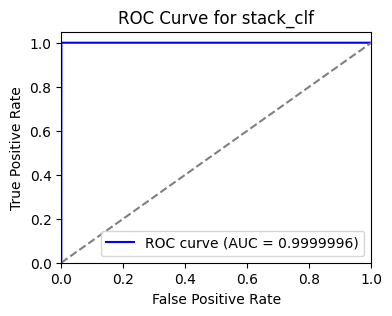

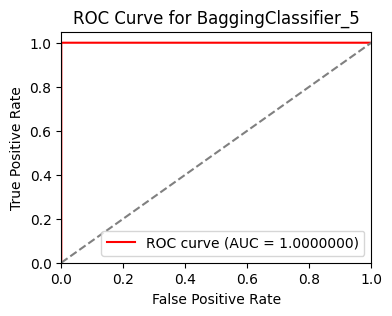

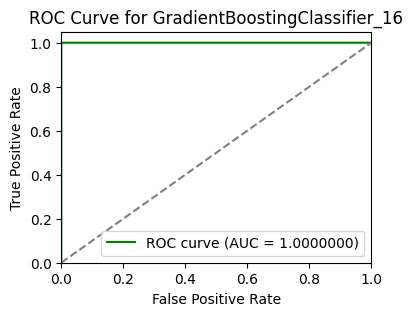

In [61]:
# Plot the ROC Curves for the 3 models

colors = ['blue', 'red', 'green']
for i, p in enumerate(final_pipes): 
    plot_roc(p, X_test, y_test, colors[i])

1. We got AUC=1 for bagging and gradient boosting, and extremely close to 1 for stacking
2. This results means our models are reaching the most desiable scenario.
3. As a result, we don't have any space to do trade off.
4. After carefully checking the code and comparing with the accuracy of train data, we can see the models don't have generalization or overfitting problem.
5. Considering to the overall performance, **BaggingClassifier_5** will be the winner.

<div style="text-align:center">
    <h3>-- END --</h3>
<div>

In [ ]:
X_test.to_json()